In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
import os
import scipy as sc
from numpy.fft import rfft, irfft
from scipy import signal
from scipy.signal import savgol_filter, lfilter
from statistics import mean
from scipy.interpolate import interp1d

In [166]:
data1,t1,lox_tp1,p_tp1,l_inj1,p_inj1,high_p1= read_data("flow2_2020-12-05__16_13.csv")



metadata: LOX Dome:  Propane Dome:  

['time elapsed' ' loxTankPressure' ' propTankPressure'
 ' loxInjectorPressure' ' propInjectorPressure' ' highPressure'
 ' loxTreeTemp' ' loxHeater' ' boardVoltage' ' energyConsumed'
 ' loxTankTemp' ' chamberTemp1' ' chamberTemp2' ' chamberTemp3' ' no']


In [167]:
propane_injector, indices = clean_data(p_inj1)
lox_injector, indices = clean_data(l_inj1)
propane_tank, indices = clean_data(p_tp1)
lox_tank, indices = clean_data(lox_tp1)
high, indices = clean_data(high_p1)
time = [t for ind, t in enumerate(t1) if ind in indices]

start: 0, end: -1


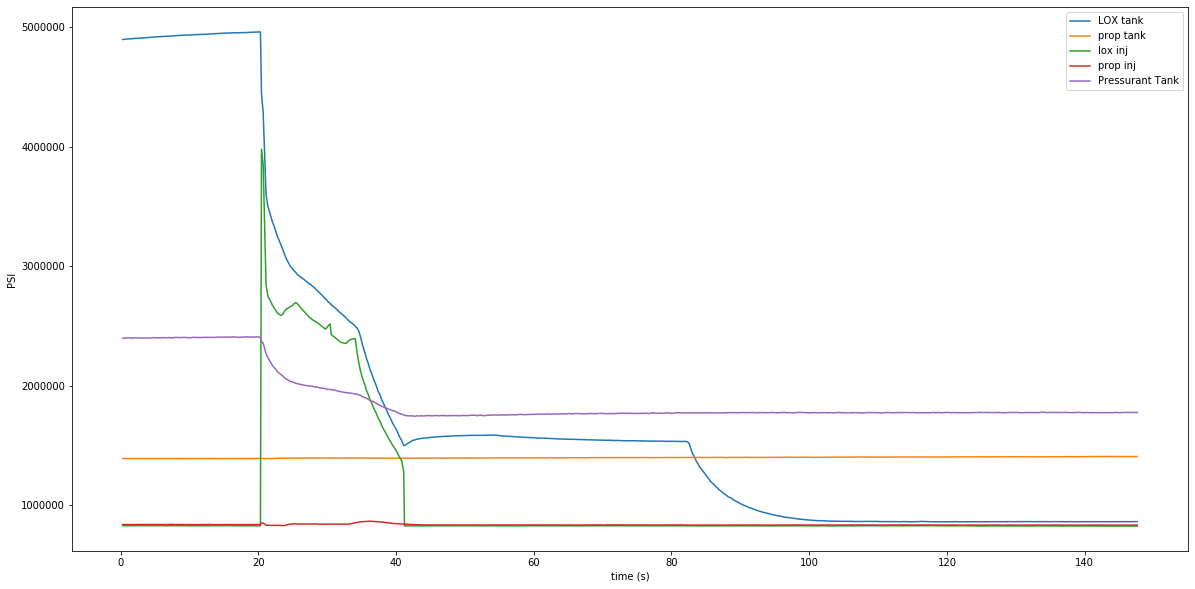

In [125]:
display_all_pressure(time, high, lox_tank, propane_tank, lox_injector, propane_injector, show_high=True)



start: 0, end: -1


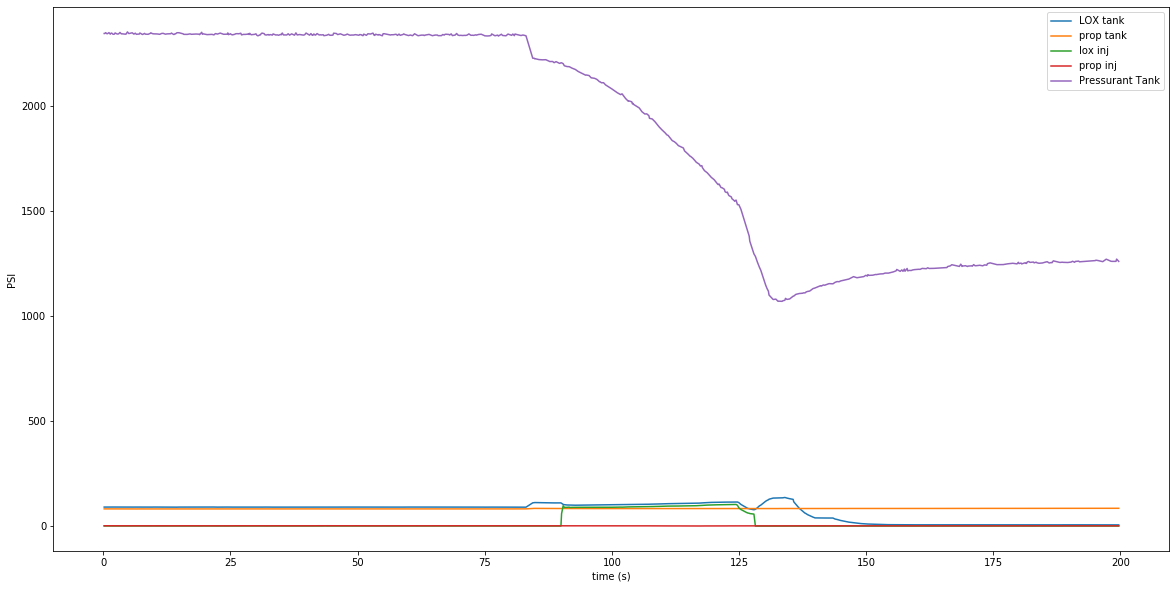

In [169]:
display_all_pressure(time, high_tank2, lox_tank2, prop_tank2, lox_inj2, prop_inj2, show_high=True)


In [168]:
lox_tank2 = []
prop_tank2 = []
lox_inj2 = []
prop_inj2 = []
high_tank2 = []
for i in lox_tank:
    lox_tank2.append(lowPressureConversion(float(i)))
for i in propane_tank: 
    prop_tank2.append(lowPressureConversion(float(i)))
for i in lox_injector:
    lox_inj2.append(lowPressureConversion(float(i)))
for i in propane_injector:
    prop_inj2.append(lowPressureConversion(float(i)))
for i in high:
    high_tank2.append(float(highPressureConversion(float(i))))
# high2 = [highPressureConversion(raw) for raw in high]
    #print(splitting[1][1])

Amount of Data Points: 551
first round peaks: []
Positive Peaks: 1
Negative Peaks: 1
Total Peaks detected: 1
[array([400])]


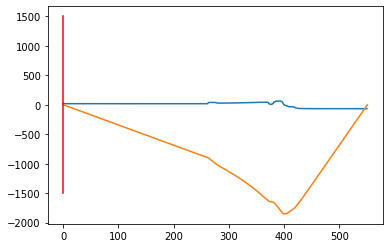

Negative Peaks Detected: 0 at []
Positive Peaks Detected: 1 at [263]
[array([400]), array([263])]
[]
This is peaksall: [array([400]), array([263]), array([269])]


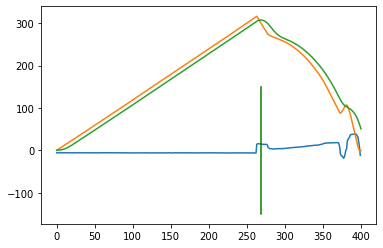

end of second round
Negative Peaks Detected: 0 at []
Positive Peaks Detected: 1 at [69]
[array([263]), array([269]), array([400]), array([70])]
[]


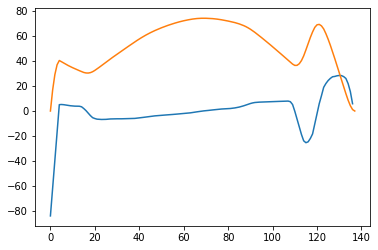

end of third round


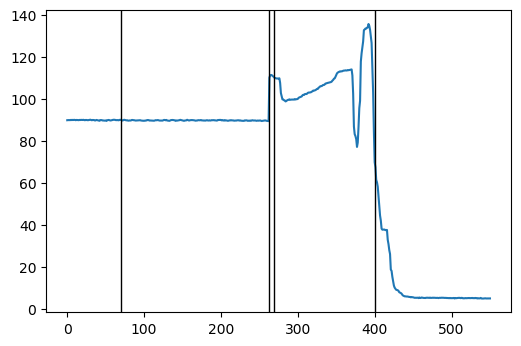

In [170]:
detect1 = detect_peaks(lox_tank2)

[array([70]), array([263]), array([269]), array([400])]


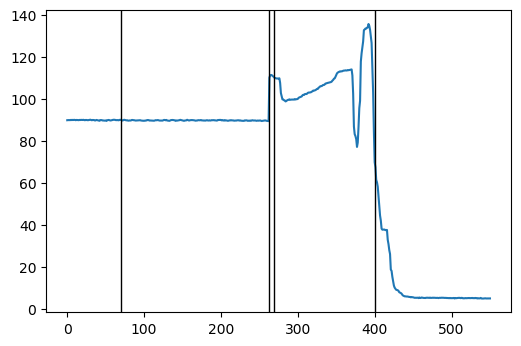

Times at which to remove lines, separated by comma, e.g. 53, 32, 9: (will find the closest line and remove it) 0,3
[0, 3]
[array([70]), array([263]), array([269]), array([400])]


<Figure size 600x400 with 0 Axes>

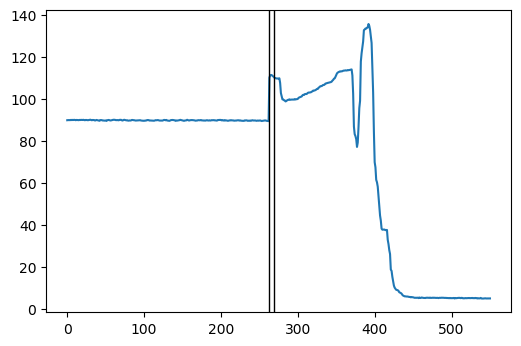

In [171]:
detect1 = remove_lines(detect1)

[array([263]), array([269])]


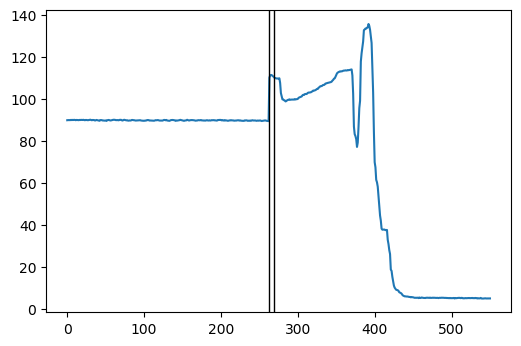

List of lines to add, by approximate X axis value (can edit later for precision):290, 390


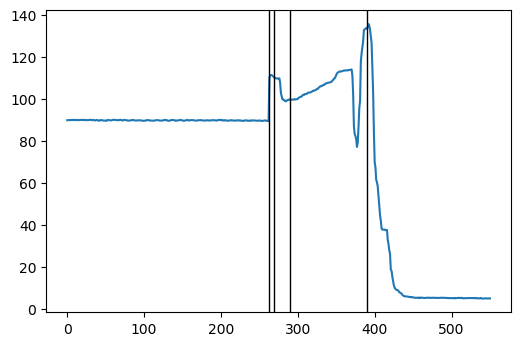

In [172]:
detect1 = add_lines(detect1)

[array([263.]), array([275.]), array([282.]), array([370.])]


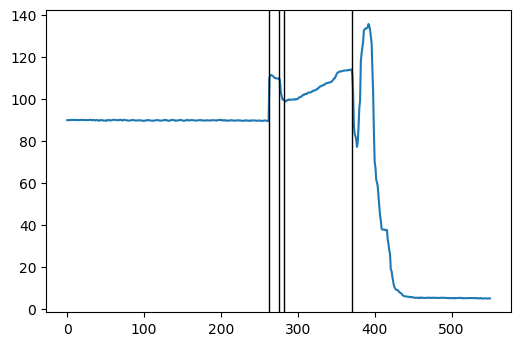

Times of lines to edit, separated by comma, e.g. 103, 58, 12: 275, 282, 370
index Pressure
270 109.89599518145158
271 109.86935850369508
272 109.71776887129431
273 109.71477598615314
274 109.67901100871603
*  109.65417006204424
276 109.79513495219382
277 107.57112200378288
278 102.7525769264829
279 101.29848368064054
280 99.76627613261337
Choose time for new line276
index Pressure
277 107.57112200378288
278 102.7525769264829
279 101.29848368064054
280 99.76627613261337
281 99.67110238512385
*  99.34727221284817
283 99.27544296945985
284 98.78909913401807
285 98.94861991204297
286 99.28247624954162
287 99.50110650910483
Choose time for new line280
index Pressure
365 113.71446768882623
366 113.62004216262198
367 113.72853424898977
368 113.78524942241515
369 113.9642239538577
*  114.00268252792188
371 111.17171247287962
372 102.45972311541843
373 86.80394094190527
374 83.2177163214862
375 82.27346105944386
Choose time for new line370


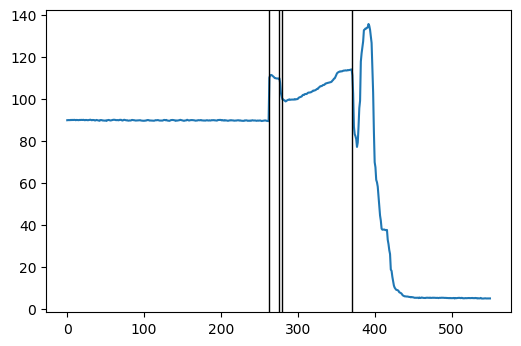

In [174]:
detect1 = edit_lines(detect1)

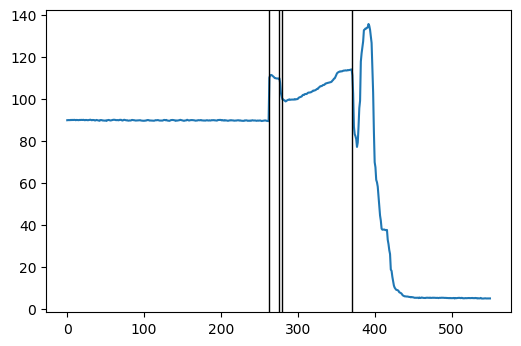

Data Type (high, injector, or tank)tank
263 276
Static Pressure: 110.33567303088434
Dynamic Pressure: 105.53123633739924
Droop: 4.804436693485101
Emptying Time: 33.49924087524414
Dyanmic Rate of Increase: 0.42497698524951283
12/5 coldflow 2 coldflow 2 - lox tank


In [175]:
prop_tank_values = values(detect1)
name = "coldflow 2 - lox tank"
print("12/5 coldflow 2", name)
write_data("12/5", name)

In [3]:
def display_all_pressure(time, high, lox_tank, prop_tank, lox_inj, prop_inj, start_time = 0, end_time = -1, show_high=False):
    plt.figure(figsize=(20,10))
    indices = np.arange(len(time))
    start_index, _ = find_closest_element(time, start_time)
    if end_time != -1:
        
        end_index, _ = find_closest_element(time, end_time) 
    else:
        end_index = -1
    print("start: {}, end: {}".format(start_index, end_index))
    plt.xlabel("time (s)")
    plt.ylabel("PSI")
    plt.plot(time[start_index:end_index], lox_tank[start_index:end_index], label='LOX tank')
    plt.plot(time[start_index:end_index], prop_tank[start_index:end_index], label='prop tank')
    plt.plot(time[start_index:end_index], lox_inj[start_index:end_index], label='lox inj')
    plt.plot(time[start_index:end_index], prop_inj[start_index:end_index], label='prop inj')
    if(show_high):
        plt.plot(time[start_index:end_index], high[start_index:end_index], label='Pressurant Tank')
    plt.legend()
    plt.show()
        

In [119]:
def initHighPressure():
    data = pd.read_csv(
        os.getcwd() + "/high_pt_characterization_10_10")
    highPressureConversionFunc = interp1d(
        data['raw'], data['digital'], kind='quadratic')
    # print(type(highPressureConversionFunc))
    # print(highPressureConversionFunc(900))
    return highPressureConversionFunc



def lowPressureConversion(raw):  # raw is a value from 0 to 1024 (10bit ADC)
    return 1.2258857538273733 * raw * (1024 / pow(2, 23)) - 123.89876445934394


def highPressureConversion(raw):  # raw is a value from 0 to 1024 (10bit ADC)
    return highPressureConversionFunc(raw)

In [120]:
highPressureConversionFunc = initHighPressure()

In [6]:
def display_pressure(time, data, peaks):
    plt.figure(figsize=(20,10))
    plt.ylabel("Pressure (psi)")
    xticks = np.arange(time[0], time[-1], (time[-1] - time[0]) / 10 )
    xticks = [int(xtick) for xtick in xticks]
    plt.plot(time, data)
    plt.xticks(xticks)
    plt.xlabel("time (s)")
    
    for i in peaks:
        plt.axvline(i, c='k', lw='1')
    plt.show()

In [7]:
def find_closest_element(collection, val):
    index = min(range(len(collection)), key=lambda i: abs(collection[i]-val))
    return index, collection[index]

In [8]:
def clean_data(data):
   
    templist = list(data)
    newlist = [x for x in templist if str(x)!='nan']
    indices = [ind for ind, x in enumerate(templist) if str(x)!='nan']
    return np.array(newlist), np.array(indices)
            

In [9]:
display_all_pressure(time, [0]*len(time), lox_tank2, prop_tank2, lox_inj2, prop_inj2)

NameError: name 'time' is not defined

In [10]:
print(len(time))
print(len(high_tank2))

NameError: name 'time' is not defined

In [11]:
print(prop_tank2)

NameError: name 'prop_tank2' is not defined

In [12]:
#dynamic, emptying time, dynamic rate of increase
test2_lox_inj = [76.22718633586173, 17.60936188697815, 0.7377533757304678]
#static, dynamic, droop, emptying time, dynamic rate of increase
test2_lox_tank = [123.7974793117073, 104.95453668303333, 18.84294262867398, 18.0648741722107, 1.0829382581404838]
test2_prop_inj = [77.44950276380159, 18.64210486412049, -0.05328467925687446]
test2_prop_tank = [193.68206039338992, 176.81231401065682, 16.869746382733098, 18.73004412651062, -0.17745545985303465]
test1_lox_tank = [97.12183550622007, 71.50656889736656, 25.615266608853503, 22.92972803115846, 1.4782652419116784]
#dynamic pressure, emptying time, dynamic rate of increase, pressure drop
test2_high_tank = [1686.4169745190313, 23.958981037139893, -55.95040049811425, 1340.5145845547017]
test1_prop_tank = [178.06474136188265, 155.37147998909526, 22.69326137278739, 21.296677827835083, -0.0031057783826562734]
test1_prop_inj = [67.82779662439178, 20.68800401687622, 0.16887056008156426]
test1_lox_inj = [53.83652147112847, 23.13576602935791, 0.8625200329868745]
test1_high_tank = [2855.0325072342034, 26.237735748290994, -46.62672877140933, 1223.37978831147, 105.0156906092543]

test3_prop_inj = [68.314216404294, 21.025480985641494, -0.17139836187129392]
test3_lox_inj = [51.06397259108941, 23.357786178588896, -0.2171136506130567]
test3_lox_tank = [121.83414409352031, 67.79791831412099, 54.03622577939932, 15.497340202331557, -0.7362795455075899]
test3_prop_tank = [181.18447729010236, 149.29844762582573, 31.886029664276634, 21.270038127899184, -0.3352883674104366]
test3_high_tank = [3770.2094261163365, 26.90993690490724, -39.113680388591604, 1052.5466713757078]

test4_lox_inj = [60.154707616556536, 22.135093927383423, 0.4481466484274826]
test4_prop_inj = [68.88037375804322, 20.441934108734134, -0.12192949709733493]
test4_prop_tank = [178.0893744081598, 150.8529777112968, 27.23639669686301, 20.938995122909557, -0.27872759104722783]
test4_lox_tank = [134.88072739646782, 82.16583904754214, 52.71488834892568, 21.310685157775882, -0.21386292647311303]
test4_high_tank = [2789.385732663199, 33.611534118652344, -59.847755865295774, 2011.5748881911647]

test5_lox_inj = [87.44603082102252, 17.3920738697052, 1.0895797125964783]
test5_prop_inj = [73.60577647428177, 20.239260911941525, -0.030676714196192726]
test5_lox_tank = [154.15134451400402, 122.44753839117512, 31.703806122828908, 17.26363801956176, 0.9737309107975057]
test5_prop_tank = [177.217767912509, 160.53794041809675, 16.67982749441225, 18.991994857788086, -0.09768797395481298]
test5_high_tank = [1402.027406799615, 22.77656292915345, -42.02095841258569, 957.093003627598]



In [138]:
print(prop_tank_values)

[22.542207002639763, -42.25071949265419, 1406.329218031416, 'NaN', 'NaN', 952.4244648138776, 'NaN']


In [112]:
print(high_tank2[80]-high_tank2[196])

957.093003627598


In [105]:
##function for creating separate arrays for each column in data file 
def read_data(data_file):
    
    f = open(os.getcwd() + "/data/"+ data_file, 'r')
    print("metadata: {}".format(f.readline()))
    
    data = pd.read_csv(f)
    #print(data)
    cols = data.columns.to_numpy()
    #print(cols)
    time = data[cols[0]].to_numpy()# time
    print(cols)
    #print(time)
    #lox_tank_temp = data[cols[1]].to_numpy()
    #lox_heater_pwm = data[cols[2]].to_numpy()  # high pt
    lox_tank_pressure = data[cols[3]].to_numpy() # lox tank
    propane_tank_pressure = data[cols[4]].to_numpy()  # propane tank
    lox_injector = data[cols[5]].to_numpy()  # lox injector
    propane_injector = data[cols[6]].to_numpy() #propane injector
    high_pressure = data[cols[7]].to_numpy() #high pressure
    #voltage = data[cols[8]].to_numpy() # voltage
    #power = data[cols[9]].to_numpy() #power
    #energy = data[cols[10]].to_numpy() #energy
    
    return data, time, lox_tank_pressure, propane_tank_pressure, lox_injector, propane_injector, high_pressure



In [37]:
def write_data(data, data_type):
    f = open("waterflow_data.txt", "a")
    f.write(data)
    f.write("  ")
    f.write(data_type)
    f.write("  ")
    for x in prop_tank_values:
        f.write(str(x))
        f.write("  ")
    f.write("\n")
    f.close()

In [15]:
##current version of detect function
##added third "zoom-in" without dary data 
def detect_peaks(pdata):
    #time = data[0]
    #pdata = data[1]
    
    print("Amount of Data Points:", len(pdata))
    n = 100  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    filter_data2 = lfilter(b,a,pdata)
    dary = np.array([*map(float, pdata)])
    dary -=np.average(dary)
    step = np.hstack((np.ones(len(dary)), -1*np.ones(len(dary))))

    dary_step = np.convolve(dary, step, mode='valid')
    peaksall=[]
    peaks = signal.find_peaks(dary_step, width=20)[0]
    print("first round peaks:", peaks)
    if len(peaks)>0:
        for p in peaks:
            
            peaksall.append(np.array([p]))
    ##adding 0 to peaks in case empty
    elif len(peaks)==0:
        peaks=[0] 
        
    print("Positive Peaks:", len(peaks))
    peaks2 = signal.find_peaks(-dary_step, width=20)[0]
    print("Negative Peaks:", len(peaks2))
    if len(peaks2)>0:
        for p in peaks2:
            
            peaksall.append(np.array([p]))
    print("Total Peaks detected:", len(peaksall))
    peaksall.sort()
    print(peaksall)
    plt.figure()

    plt.plot(dary)

    plt.plot(dary_step/10)

    for ii in range(len(peaks)):
        plt.plot((peaks[ii], peaks[ii]), (-1500, 1500), 'r')

    plt.show()
    ##start of second round
    #creating new data set with first and last peak as lower, upper bounds
    if len(peaksall)>=2:
        data2 = pdata[int(peaksall[0][0]):int(peaksall[-1][-1])]
    else:
        data2 = pdata[0:int(peaksall[-1])]
    ##
    n = 5  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    #filter_data = lfilter(b,a,data2)
    ##
    dary2 = np.array([*map(float, data2)])
    
    dary2 -=np.average(dary2)
    step2 = np.hstack((np.ones(len(dary2)), -1*np.ones(len(dary2))))
    
    dary_step2 = np.convolve(dary2, step2, mode='valid')

    # Get the peaks of the convolution
    #negative peaks
    peaks3 = signal.find_peaks(-dary_step2, width=20)[0]
    #positive peaks
    peaks4 = signal.find_peaks(dary_step2, width=20)[0]
    #adjusting for frame shift
    if len(peaksall)>=2:
        if len(peaks3)>0:
            for p in range(len(peaks3)):
                peaksall.append(np.array([peaks3[p]+peaks[0]+1]))
            #peaksall.append(peaks3+peaks+1)
        print("Negative Peaks Detected:", len(peaks3), "at", peaks3)
        if len(peaks4)>0:
            for p in range(len(peaks4)):
                peaksall.append(np.array([peaks4[p]+peaks[0]+1]))
            #peaksall.append(peaks4+peaks+1)
        print("Positive Peaks Detected:", len(peaks4), "at", peaks4)
        print(peaksall)
    else:
        if len(peaks3)>0:
            for p in range(len(peaks3)):
                peaksall.append(np.array([peaks3[p]]))
        print("Negative Peaks Detected:", len(peaks3),"at",peaks3)
        if len(peaks4)>0:
            for p in peaks4:
                
                peaksall.append(np.array([p]))
        print("Positive Peaks Detected:", len(peaks4),"at", peaks4)
        print(peaksall)
    ###make this more robust
    #peaks2 = signal.find_peaks(-dary_step, width=20)[0]
    print(peaks3)

    # plots
    plt.figure()

    plt.plot(dary2)
    #orange:
    plt.plot(dary_step2/10)
    #repeat process on dary data:
    n = 20  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    filter_data3 = lfilter(b,a,dary_step2/10)
    peaks40 = signal.find_peaks(filter_data3, width=20)[0]
    peaks30 = signal.find_peaks(-filter_data3, width=20)[0]
    peaksall2=[]
    plt.plot(filter_data3)
    for ii in range(len(peaks40)):
        plt.plot((peaks40[ii], peaks40[ii]), (-150, 150), 'green')
    ##adding to master graph
    if len(peaksall)>=2:
        if len(peaks30)>0:
            for p in range(len(peaks30)):
                print("testing peaks:",peaks)
                print("testing peaks30:", peaks30)
                peaksall2.append(np.array([peaks30[p]+peaks[0]+1]))
#                 print("testing something:", np.array([peaks30[p]+peaks[p]+1]))
            #peaksall2.append(peaks30+peaks+1)
#         print("Negative Peaks Detected:", len(peaks30), "at", peaks30)
        if len(peaks40)>0:
            for p in range(len(peaks40)):
                peaksall2.append(np.array([peaks40[p]+peaks[0]+1]))
            #peaksall2.append(peaks40+peaks+1)
#         print("Positive Peaks Detected:", len(peaks40), "at", peaks40)
#         print("This is peaksall2:",peaksall2)
    else:
        if len(peaks30)>0:
            for p in peaks30:
                peaksall2.append(np.array([p]))
            #peaksall2.append(peaks30)
        print("Negative Peaks Detected:", len(peaks30),"at",peaks30)
        if len(peaks40)>0:
            for p in peaks40:
                peaksall.append(np.array([p]))
            #peaksall2.append(peaks40)
        print("Positive Peaks Detected:", len(peaks40),"at", peaks40)
        print(peaksall2)
    ## appending 2nd round of lines to first
    
    peaksall = peaksall + peaksall2
    print("This is peaksall:", peaksall)
    peaksall.sort()
    
        
    for ii in range(len(peaks3)):
        plt.plot((peaks3[ii], peaks3[ii]), (-150, 150), 'r')

    plt.show()
    
    ##end of second round
    print("end of second round")
    
    ##start of third round
    #creating new data set with first and last peak as lower, upper bounds
    if len(peaksall)>=2:
        data2 = pdata[int(peaksall[0][0]):int(peaksall[2][-1])]
    else:
        data2 = pdata[0:int(peaksall[-1])]
    ##
    n = 5  # the larger n is, the smoother curve will be
    b = [1.0 / n] * n
    a = 1
    filter_data4 = lfilter(b,a,data2)
    ##
    dary2 = np.array([*map(float, filter_data4)])
    
    dary2 -=np.average(dary2)
    step2 = np.hstack((np.ones(len(dary2)), -1*np.ones(len(dary2))))

    dary_step2 = np.convolve(dary2, step2, mode='valid')

    # Get the peaks of the convolution
    #negative peaks
    peaks3 = signal.find_peaks(-dary_step2, width=20)[0]
    #positive peaks
    peaks4 = signal.find_peaks(dary_step2, width=20)[0]
    #adjusting for frame shift
    if len(peaksall)>=2:
        if len(peaks3)>0:
            for p in range(len(peaks3)):
                peaksall.append(np.array([peaks3[p]+peaks[0]+1]))
            #peaksall.append(peaks3+peaks+1)
        print("Negative Peaks Detected:", len(peaks3), "at", peaks3)
        if len(peaks4)>0:
            for p in range(len(peaks4)):
                peaksall.append(np.array([peaks4[p]+peaks[0]+1]))
            #peaksall.append(peaks4+peaks+1)
        print("Positive Peaks Detected:", len(peaks4), "at", peaks4)
        print(peaksall)
    else:
        if len(peaks3)>0:
            for p in range(len(peaks3)):
                peaksall.append(np.array([peaks3[p]]))
        print("Negative Peaks Detected:", len(peaks3),"at",peaks3)
        if len(peaks4)>0:
            for p in peaks4:
                
                peaksall.append(np.array([p]))
        print("Positive Peaks Detected:", len(peaks4),"at", peaks4)
        print(peaksall)
    ###make this more robust
    #peaks2 = signal.find_peaks(-dary_step, width=20)[0]
    print(peaks3)

    # plots
    plt.figure()

    plt.plot(dary2)
    #orange:
    plt.plot(dary_step2/10)
    
    peaksall.sort()
    
        
    for ii in range(len(peaks3)):
        plt.plot((peaks3[ii], peaks3[ii]), (-150, 150), 'r')

    plt.show()
    
    ##end of third round
    print("end of third round")
    
    
    #peak_times = [time[peak[0]] for peak in peaksall]


    #display_pressure(time, pdata, peak_times)
    plt.figure(dpi=100)
    plt.plot(pdata)
    for i in peaksall:
        for t in i:
            plt.axvline(t, c='k', lw='1') 
    plt.show()
    
    return [pdata,peaksall]

In [16]:
##function for adding lines
def add_lines(detect_data):
    ##plotting input data
    
    peaksall = detect_data[1]
    data = detect_data[0]
    
    
    print(peaksall)
    plt.figure(dpi=100)
    plt.plot(data)
    for i in peaksall:
        for t in i:
            plt.axvline(t, c='k', lw='1') 
    plt.show()
    
    ##adding new lines with user input
    
    user_input3 = input("List of lines to add, by approximate X axis value (can edit later for precision):")
    
    if user_input3:
        new_lines =  list(map(int,user_input3.split(',')))
        
        for i in new_lines:
            peaksall.append(np.array([i]))
 
        plt.figure(dpi=100)
        plt.plot(data)
        for i in peaksall:
            for t in i:
                plt.axvline(t, c='k', lw='1')

        plt.show()
    
    peaksall.sort()
    
    return [data, peaksall]
    

In [17]:
##function for editing lines
def edit_lines(detect_data):
    
    peaksall = detect_data[1]
    data = detect_data[0]
    
    
    ###shifting lines with user input
    print(peaksall)
    plt.figure(dpi=100)
    plt.plot(data)
    for i in peaksall:
        for t in i:
            plt.axvline(t, c='k', lw='1') 
    plt.show()
    user_input2 = input("Times of lines to edit, separated by comma, e.g. 103, 58, 12: ") 
    
    if user_input2:
        time_list =  list(map(int,user_input2.split(',')))
        #index_list = [find_closest_element(time, t)[0] for t in time_list]
        #print(index_list)
        
        for i in time_list:

            print("index", "Pressure")
            print(i-5,data[i-5])
            print(i-4,data[i-4])
            print(i-3,data[i-3])
            print(i-2,data[i-2])
            print(i-1,data[i-1])
            #print("Current Line:")
            print("* ",data[i])
            print(i+1,data[i+1])
            print(i+2,data[i+2])
            print(i+3,data[i+3])
            print(i+4,data[i+4])
            print(i+5,data[i+5])

            user_input3 = input("Choose time for new line")

            if user_input3:
                #peak_i, _ = find_closest_element(peaksall, time[i])
                peaksall.remove(i)
                peaksall.insert(i, np.array([float(user_input3)]))
            else:
                None


    #display_pressure(time, data, peaksall)
    plt.figure(dpi=100)
    plt.plot(data)
    for i in peaksall:
        for t in i:
            plt.axvline(t, c='k', lw='1') 
    plt.show()
    peaksall.sort()
    return [data, peaksall]
    

In [18]:
##function for removing lines
def remove_lines(detect_data):
    ##plotting input data
    
    peaksall = detect_data[1] # actual times, not indices.
    
    data = detect_data[0]
    print(peaksall)
    plt.figure(dpi=100)
    plt.plot(data)
    for i in peaksall:
        for t in i:
            plt.axvline(t, c='k', lw='1') 
    plt.show()
    #display_pressure(time, data, peaksall)
    
    ##taking user input and removing lines
    user_input = input("Times at which to remove lines, separated by comma, e.g. 53, 32, 9: (will find the closest line and remove it) ")
    
    if user_input:
        a_list =  list(map(int,user_input.split(',')))
        print(a_list)
        print(peaksall)

        #removing lines at index indicated by user input, using inserts to maintain list length in process
        for t in a_list:
            #i, _ = find_closest_element(peaksall, t)
            del peaksall[t]
            peaksall.insert(t, 69.69)

        #display_pressure(time, data, peaksall)
            plt.figure(dpi=100)
        plt.plot(data)
        peaksall = [x for x in peaksall if x!=69.69]
        for i in peaksall:
            for t in i:
                plt.axvline(t, c='k', lw='1') 
        plt.show()
        return [data, peaksall]

In [19]:
##function for returning values
def values(detect_data):
    ##plotting input data
    ##data[0] = pressure data
    ##data[1] = array of detected peaks
    peaksall = detect_data[1]
    data = detect_data[0]
    
    
    plt.figure(dpi=100)
    plt.plot(data)
    for i in peaksall:
        for t in i:
            plt.axvline(t, c='k', lw='1') 
    plt.show()
    
    
    ##taking input on data type and returning parameters according to data type
    ##can probably be done with radios in gui
    data_type = input("Data Type (high, injector, or tank)")
    
    if "tank" in data_type:
        static_start_index = int(peaksall[0][0])
        static_end_index = int(peaksall[1][0])
        dynamic_start_index= int(peaksall[2][0])
        dynamic_end_index = int(peaksall[3][0])
        
        print(static_start_index, static_end_index)
        static_condition = data[static_start_index:static_end_index]
        static_pressure = mean(static_condition)
        print("Static Pressure:", static_pressure)
        dynamic_condition = data[dynamic_start_index: dynamic_end_index]
        dynamic_pressure = mean(dynamic_condition)
        print("Dynamic Pressure:", dynamic_pressure)
        droop = static_pressure - dynamic_pressure 
        print("Droop:", droop)
        emptying_time = time[int(peaksall[3][0])]-time[int(peaksall[2][0])]
        print("Emptying Time:", emptying_time)
        dynamic_rate_of_increase = (data[dynamic_end_index]-data[dynamic_start_index])/emptying_time
        print("Dyanmic Rate of Increase:", dynamic_rate_of_increase)
        return [emptying_time, dynamic_rate_of_increase, dynamic_pressure, static_pressure, droop, "NaN", "NaN"]
    elif "injector" or "high" in data_type:
        dynamic_start_index= int(peaksall[0][0])
        dynamic_end_index = int(peaksall[1][0])
        
        dynamic_condition = data[dynamic_start_index: dynamic_end_index]
        print("All Peaks:", peaksall)
       
        dynamic_pressure = mean(dynamic_condition)
        print("Dynamic Pressure:", dynamic_pressure)
        emptying_time = time[int(peaksall[1][0])]-time[int(peaksall[0][0])]
        print("Emptying Time:", emptying_time)
        dynamic_rate_of_increase = (data[dynamic_end_index]-data[dynamic_start_index])/emptying_time
        print("Dyanmic Rate of Increase:", dynamic_rate_of_increase)
        if "high" in data_type:
            pressure_drop = (data[dynamic_start_index]-data[dynamic_end_index])
            print("Pressure Drop:", pressure_drop)
            return [emptying_time, dynamic_rate_of_increase, dynamic_pressure , "NaN", "NaN", pressure_drop, "NaN"]
        return [emptying_time, dynamic_rate_of_increase, dynamic_pressure , "NaN", "NaN", "NaN", "NaN"]
        
    
    
        
        
    else:
        ##implement a better way to do this
        print("try again")
        values(detect_data)
     